# Sect 25-Pt 2: Intro to Logistic Regression 

- online-ds-pt-041320
- 09/02/20

## Questions?

## From Last Class/Gdoc

- I’m confused about ROC and AUC. 
    - how are the false positive or false negative percents a parameter for ROC? 
    - How do you graph one vs the other when they are fixed values?<br>I don’t think I’m understanding what’s going on under the hood with this function…


- Pseudo R-squared from Statsmodels Logit summary


- Logistic Regression in Scikit Learn  Lab: 
    - Why didnt they do the get dummies?
    - 
logreg = `LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')` 
        - why is the fit_intercept False, and why do we assign large value to C?


### Answers

#### **Pseudo R-Squared: Stack Overflow Discussion:**
    > "Those unfamiliar with 𝜌2 should be forewarned that its values tend to be considerably lower than those of the 𝑅2 index...For example, values of 0.2 to 0.4 for 𝜌2 represent EXCELLENT fit."
<br><br> So basically, 𝜌2 can be interpreted like 𝑅2, but don't expect it to be as big. And values from 0.2-0.4 indicate (in McFadden's words) excellent model fit."
- Source: https://stats.stackexchange.com/questions/82105/mcfaddens-pseudo-r2-interpretation
    
    
#### Scikit Learn Logistic Regression parameters:
- From the docstring for LogsisticRegression,C:
```C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify strong```
    
- Scikit-Learn Logistic Regression User Guide:
    - https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

## Topics in Sect 25

- Last Class:
    - Supervised vs Unsupervised Learning
    - Logistic Regression - Theory
    - Applying Logistic Regression with `statsmodels`
    - Evaluating Classifiers
        - Accuracy, Precision, Recall, F1-Score
        - Confusion Matrices


- Today:
    - Logistic Regression with scikit-learn
    - Evaluating Classifiers:
        - ROC-AUC curve
    - Class Imbalance Problems

# Previously on...

## Implementing Logistic Regression

#### Predict Passenger Survival on Titanic

In [70]:
# !pip install fsds
from fsds.imports import *

In [71]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
0,3,22.0,1,7.2500,male,S,0
1,1,38.0,1,71.2833,female,C,1
2,3,26.0,0,7.9250,female,S,1
3,1,35.0,1,53.1000,female,S,1
4,3,35.0,0,8.0500,male,S,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    object 
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [73]:
# Recast Number Cols
df['Pclass'] = pd.to_numeric(df['Pclass'],errors='coerce')

In [74]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

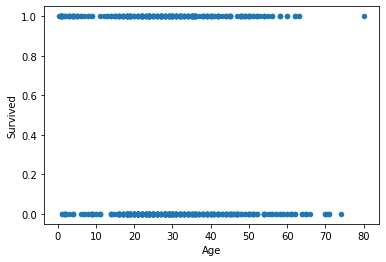

In [75]:
df.plot('Age','Survived',kind='scatter');

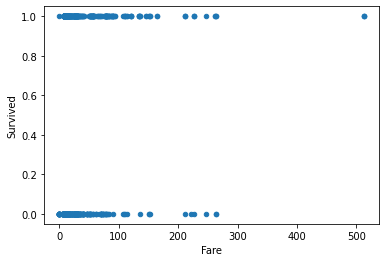

In [76]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

<!-- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split
-->

- Train-test-split
- Address null values
- Encode categorical data
- Train Model with train data
- Evaluate Model with test data

### Preprocessing

In [77]:
## Null Values
df.isna().sum() / len(df)

Pclass      0.054994
Age         0.198653
SibSp       0.000000
Fare        0.000000
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [78]:
target = 'Survived'
X = df.drop(columns=target)
y = df[target]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
target = 'Survived'

In [80]:
cat_cols = df.drop(columns=target).select_dtypes('O').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [81]:
num_cols = df.drop(columns=target).select_dtypes('number').columns
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [82]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_test.shape

((668, 6), (223,))

In [83]:
X_train.isna().sum()

Pclass       40
Age         135
SibSp         0
Fare          0
Sex           0
Embarked      1
dtype: int64

In [84]:
## Saving null value indices
train_nulls = X_train.isna().any(axis=1)
test_nulls = X_test.isna().any(axis=1)


In [85]:

# dropna_cols = [*cat_cols,'Age']
X_train = X_train.loc[~train_nulls]
y_train = y_train.loc[~train_nulls]

X_test = X_test.loc[~test_nulls]
y_test = y_test.loc[~test_nulls]
# X_train.isna().sum()

In [86]:
X_train.isna().sum(), X_test.isna().sum()

(Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64,
 Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64)

In [87]:
## REMOVED FROM WORKFLOW
# from sklearn.impute import SimpleImputer
# imputer_num = SimpleImputer(strategy='median')

# X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
# X_test[num_cols] = imputer_num.transform(X_test[num_cols])

# X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
# X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])


In [88]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')#,handle_unknown='ignore')

X_train_ohe = X_train.drop(columns=cat_cols).copy()
X_test_ohe = X_test.drop(columns=cat_cols).copy()


encoder.fit(X_train[cat_cols])

X_train_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_train[cat_cols])
X_test_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_test[cat_cols])

X_train_ohe

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
585,1.0,18.00,0,79.6500,0.0,0.0,1.0
305,1.0,0.92,1,151.5500,1.0,0.0,1.0
676,3.0,24.50,0,8.0500,1.0,0.0,1.0
419,3.0,10.00,0,24.1500,0.0,0.0,1.0
439,2.0,31.00,0,10.5000,1.0,0.0,1.0
...,...,...,...,...,...,...,...
744,3.0,31.00,0,7.9250,1.0,0.0,1.0
127,3.0,24.00,0,7.1417,1.0,0.0,1.0
134,2.0,25.00,0,13.0000,1.0,0.0,1.0
417,2.0,18.00,0,13.0000,0.0,0.0,1.0


In [89]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= StandardScaler()

X_train_sca = X_train_ohe.copy()
X_test_sca = X_test_ohe.copy()


X_train_sca[num_cols] = scaler.fit_transform(X_train_sca[num_cols])
X_test_sca[num_cols] = scaler.transform(X_test_sca[num_cols])

X_train_sca

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
585,-1.471846,-0.750518,-0.583130,0.760796,0.0,0.0,1.0
305,-1.471846,-1.902998,0.477491,2.024536,1.0,0.0,1.0
676,0.919308,-0.311928,-0.583130,-0.497672,1.0,0.0,1.0
419,0.919308,-1.290321,-0.583130,-0.214692,0.0,0.0,1.0
439,-0.276269,0.126661,-0.583130,-0.454610,1.0,0.0,1.0
...,...,...,...,...,...,...,...
744,0.919308,0.126661,-0.583130,-0.499869,1.0,0.0,1.0
127,0.919308,-0.345666,-0.583130,-0.513636,1.0,0.0,1.0
134,-0.276269,-0.278191,-0.583130,-0.410669,1.0,0.0,1.0
417,-0.276269,-0.750518,-0.583130,-0.410669,0.0,0.0,1.0


In [90]:
## Verify scaling
X_train_ohe.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
count,502.00,502.00,502.00,502.00,502.00,502.00,502.00
mean,2.23,29.12,0.55,36.36,0.64,0.03,0.78
std,0.84,14.84,0.94,56.95,0.48,0.18,0.42
min,1.00,0.42,0.00,0.00,0.00,0.00,0.00
25%,1.00,20.00,0.00,8.05,0.00,0.00,1.00
50%,2.00,28.00,0.00,15.85,1.00,0.00,1.00
75%,3.00,37.75,1.00,36.94,1.00,0.00,1.00
max,3.00,80.00,5.00,512.33,1.00,1.00,1.00


In [91]:
X_train_sca.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
count,502.00,502.00,502.00,502.00,502.00,502.00,502.00
mean,0.00,-0.00,0.00,-0.00,0.64,0.03,0.78
std,1.00,1.00,1.00,1.00,0.48,0.18,0.42
min,-1.47,-1.94,-0.58,-0.64,0.00,0.00,0.00
25%,-1.47,-0.62,-0.58,-0.50,0.00,0.00,1.00
50%,-0.28,-0.08,-0.58,-0.36,1.00,0.00,1.00
75%,0.92,0.58,0.48,0.01,1.00,0.00,1.00
max,0.92,3.43,4.72,8.37,1.00,1.00,1.00


## Fitting a Logistic Regression with `statsmodels`

In [92]:
import statsmodels.api as sm

In [93]:
y_train.value_counts()

0    297
1    205
Name: Survived, dtype: int64

In [94]:
X_train_sms = sm.add_constant(X_train_sca)
X_test_sms = sm.add_constant(X_test_sca)
X_train_sms

,const,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
585,1.0,-1.471846,-0.750518,-0.583130,0.760796,0.0,0.0,1.0
305,1.0,-1.471846,-1.902998,0.477491,2.024536,1.0,0.0,1.0
676,1.0,0.919308,-0.311928,-0.583130,-0.497672,1.0,0.0,1.0
419,1.0,0.919308,-1.290321,-0.583130,-0.214692,0.0,0.0,1.0
439,1.0,-0.276269,0.126661,-0.583130,-0.454610,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
744,1.0,0.919308,0.126661,-0.583130,-0.499869,1.0,0.0,1.0
127,1.0,0.919308,-0.345666,-0.583130,-0.513636,1.0,0.0,1.0
134,1.0,-0.276269,-0.278191,-0.583130,-0.410669,1.0,0.0,1.0
417,1.0,-0.276269,-0.750518,-0.583130,-0.410669,0.0,0.0,1.0


In [95]:
logit = sm.Logit(y_train,X_train_sms).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.461427
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  502
Model:                          Logit   Df Residuals:                      494
Method:                           MLE   Df Model:                            7
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.3177
Time:                        19:01:47   Log-Likelihood:                -231.64
converged:                       True   LL-Null:                       -339.48
Covariance Type:            nonrobust   LLR p-value:                 5.418e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3443      0.312      4.302      0.000       0.732       1.957
Pclass        -0.9033      0.158     -5.716      0.000      -1.213      -0.594
Age           -0.5996      0.139     -4.303      0.000      -0.873      -0.326
SibSp         -0.2482      0.130     -1.905      0.057      -0.503       0.007
Fare           0.0908      0.145      0.627      0.531      -0.193       0.375
Sex_male      -2.5067      0.249    -10.066      0.000      -2.995      -2.019
Embarked_Q    -0.4787      0.747     -0.641      0.522      -1.943       0.986
Embarked_S    -0.2550      0.307     -0.830      0.407      -0.857       0.347
==============================================================================
"""

In [96]:
from sklearn import metrics
y_hat_train = logit.predict(X_train_sms).round()
y_hat_test = logit.predict(X_test_sms).round()
display(y_hat_train.head(),y_train.head())

585    1.0
305    1.0
676    0.0
419    1.0
439    0.0
dtype: float64

585    1
305    1
676    0
419    0
439    0
Name: Survived, dtype: int64

In [155]:
def remake_df(array,df):
    """Returns the array as a df with the same columns and index as df"""
    return pd.DataFrame(array, columns=df.columns, index=df.index)


def plot_confusion_matrix(y_test,y_hat_test, normalize='true',
                          classes=['Died','Survived'],cmap='Blues',
                         style='seaborn-notebook'):
    """Plots Confusion Matrix from sklearn."""
    
    cm = metrics.confusion_matrix(y_test,y_hat_test.round(),
                                  normalize=normalize)
    
    with plt.style.context(style):
        ax = sns.heatmap(cm,annot=True,square=True, center=0,cmap=cmap,
                   xticklabels=classes,yticklabels=classes)
        
    if normalize==False:
        title = "Raw Confusion Matrix"
    else:
        title = f"Normalized Confusion Matrix\n(by {normalize} classes)"
        
    ax.set(ylabel='True Classes',xlabel='Predicted Classes',title=title)
    fig = ax.get_figure()
    
    return fig,ax


def evaluate_model(y_test,y_hat_test,classes=['Died','Survived'],
                   normalize='true',cmap='Blues'):
    """Evaluates Classification models by displaying:
    - Classification Report
    - Normalized Confusion Matrix"""
    dashes = '---'*20
    print(dashes)
    print("[i] CLASSIFICATION REPORT")
    print(dashes)
    
    print(metrics.classification_report(y_test,y_hat_test.round(),
                                        target_names=classes))
    print(dashes)
    fig,ax = plot_confusion_matrix(y_test,y_hat_test)

    
def get_model_coeffs(X_df,model, statsmodels=True):
        
    if statsmodels == False:
        coeffs_df = pd.DataFrame({'Coefficients':model.coef_[0]},index=X_df.columns)
        coeffs_df.loc['const'] = model.intercept_
        coeffs_df
        # dict(zip(X_df.col
#         coeffs_df = pd.DataFrame(coeffs,index=['Coefficents']).Tx

    else:
        coeffs_df = pd.DataFrame({
            'Coefficents':model.params,
            'p-values':model.pvalues.round(4)
        })
        
    return coeffs_df

Optimization terminated successfully.
         Current function value: 0.461427
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  502
Model:                          Logit   Df Residuals:                      494
Method:                           MLE   Df Model:                            7
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.3177
Time:                        19:12:30   Log-Likelihood:                -231.64
converged:                       True   LL-Null:                       -339.48
Covariance Type:            nonrobust   LLR p-value:                 5.418e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3443      0.312      4.302      0.000       0.732       1.957
Pclass        -0.9033      0.158     -5.716      0.000      -1.213      -0.594
Age           -0.5996      0.139     -4.303      0.000      -0.873      -0.326
SibSp         -0.2482      0.130     -1.905      0.057      -0.503       0.007
Fare           0.0908      0.145      0.627      0.531      -0.193       0.375
Sex_male      -2.5067      0.249    -10.066      0.000      -2.995      -2.019
Embarked_Q    -0.4787      0.747     -0.641      0.522      -1.943       0.986
Embarked_S    -0.2550      0.307     -0.830      0.407      -0.857       0.347
==============================================================================
"""

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.87      0.84      0.85       112
    Survived       0.73      0.77      0.75        62

    accuracy                           0.82       174
   macro avg       0.80      0.81      0.80       174
weighted avg       0.82      0.82      0.82       174

------------------------------------------------------------


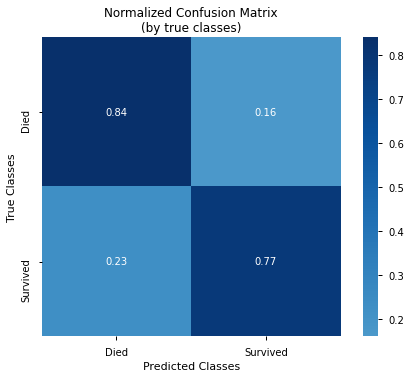

In [156]:
## Putting it all Together
logit = sm.Logit(y_train,X_train_sms).fit()
display(logit.summary())

y_hat_train = logit.predict(X_train_sms).round()
y_hat_test = logit.predict(X_test_sms).round()
evaluate_model(y_test,y_hat_test)

Optimization terminated successfully.
         Current function value: 0.461427
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  502
Model:                          Logit   Df Residuals:                      494
Method:                           MLE   Df Model:                            7
Date:                Tue, 01 Sep 2020   Pseudo R-squ.:                  0.3177
Time:                        19:12:30   Log-Likelihood:                -231.64
converged:                       True   LL-Null:                       -339.48
Covariance Type:            nonrobust   LLR p-value:                 5.418e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3443      0.312      4.302      0.000       0.732       1.957
Pclass        -0.9033      0.158     -5.716      0.000      -1.213      -0.594
Age           -0.5996      0.139     -4.303      0.000      -0.873      -0.326
SibSp         -0.2482      0.130     -1.905      0.057      -0.503       0.007
Fare           0.0908      0.145      0.627      0.531      -0.193       0.375
Sex_male      -2.5067      0.249    -10.066      0.000      -2.995      -2.019
Embarked_Q    -0.4787      0.747     -0.641      0.522      -1.943       0.986
Embarked_S    -0.2550      0.307     -0.830      0.407      -0.857       0.347
==============================================================================
"""

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.87      0.84      0.85       112
    Survived       0.73      0.77      0.75        62

    accuracy                           0.82       174
   macro avg       0.80      0.81      0.80       174
weighted avg       0.82      0.82      0.82       174

------------------------------------------------------------


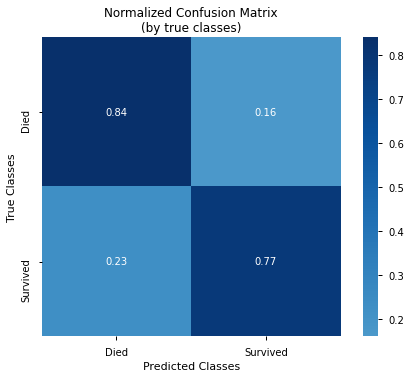

In [157]:
## Putting it all Together
logit = sm.Logit(y_train,X_train_sms).fit()
display(logit.summary())

y_hat_train = logit.predict(X_train_sms).round()
y_hat_test = logit.predict(X_test_sms).round()
evaluate_model(y_test,y_hat_test)

In [158]:
# logit.params

In [159]:
get_model_coeffs(X_train_sms,logit)

,Coefficents,p-values
const,1.344306,0.0000
Pclass,-0.903256,0.0000
Age,-0.599559,0.0000
SibSp,-0.248162,0.0567
Fare,0.090846,0.5309
Sex_male,-2.506688,0.0000
Embarked_Q,-0.478747,0.5218
Embarked_S,-0.254972,0.4068


# New 09/02


## Fitting a Logistic Regression with `sklearn`

In [160]:
from sklearn.linear_model import LogisticRegression#LinearRegression

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.87      0.85      0.86       112
    Survived       0.74      0.77      0.76        62

    accuracy                           0.82       174
   macro avg       0.81      0.81      0.81       174
weighted avg       0.82      0.82      0.82       174

------------------------------------------------------------


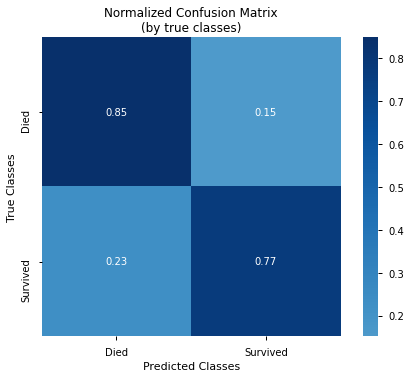

In [166]:
## Fit a logistic regression model with defaults
log_reg = LogisticRegression()#C=1e5, solver='liblinear')
log_reg.fit(X_train_sca, y_train)


y_hat_train = log_reg.predict(X_train_sca)
y_hat_test = log_reg.predict(X_test_sca)


evaluate_model(y_test,y_hat_test)

In [167]:
get_model_coeffs(X_train_sms,logit)

,Coefficents,p-values
const,1.344306,0.0000
Pclass,-0.903256,0.0000
Age,-0.599559,0.0000
SibSp,-0.248162,0.0567
Fare,0.090846,0.5309
Sex_male,-2.506688,0.0000
Embarked_Q,-0.478747,0.5218
Embarked_S,-0.254972,0.4068


------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.87      0.84      0.85       112
    Survived       0.73      0.77      0.75        62

    accuracy                           0.82       174
   macro avg       0.80      0.81      0.80       174
weighted avg       0.82      0.82      0.82       174

------------------------------------------------------------


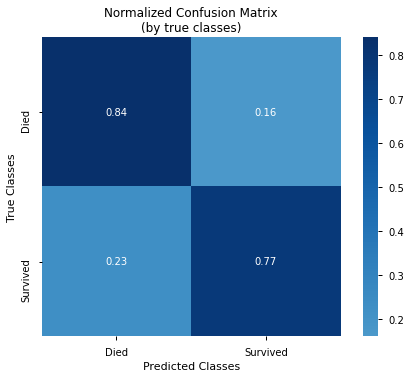

In [168]:
## Fit a logistic regression model with defaults
log_reg = LogisticRegression(C=1e5, solver='liblinear')
log_reg.fit(X_train_sca, y_train)


y_hat_train = log_reg.predict(X_train_sca)
y_hat_test = log_reg.predict(X_test_sca)


evaluate_model(y_test,y_hat_test)

In [169]:
get_model_coeffs(X_train_sca, log_reg,statsmodels=False)

,Coefficients
Pclass,-0.903283
Age,-0.599573
SibSp,-0.248164
Fare,0.090844
Sex_male,-2.506672
Embarked_Q,-0.478398
Embarked_S,-0.254891
const,1.344218


In [ ]:
# logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear',
#                            max_iter=1000)

# ROC Curve - Receiver Operating Characteristic Curve

## Evaluating Our Model

### Graph Interpretation

False Positive Rate vs True Positive Rate → for each threshold

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/roc_comparison.png" width=70%>

### Looking at Just the Logistic Regression

Imagine we have a logistic regression (classifier):
 - Turn a continuous feature to binary prediction

[**What's the threshold?**](http://app.ziteboard.com)

### What Distributions Would Work Well in Classifying?

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/roc_crossover.png">

### Defining the Threshold

![](https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/auc_rates.png)

In [170]:
# # Interactive ROC curve
# from IPython.display import IFrame
# IFrame('http://www.navan.name/roc/', width=900, height=600)

In [171]:
log_reg.decision_function

LogisticRegression(C=100000.0, solver='liblinear')

In [172]:
from sklearn.metrics import roc_curve, auc,plot_precision_recall_curve,plot_roc_curve

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites
y_score = log_reg.decision_function(X_test_sca)
y_score_prob = log_reg.predict_proba(X_test_sca)

y_score.shape, y_score_prob.shape

((174,), (174, 2))

In [173]:
y_score_prob

array([[0.69268088, 0.30731912],
       [0.87448761, 0.12551239],
       [0.78200729, 0.21799271],
       [0.26685824, 0.73314176],
       [0.22771018, 0.77228982],
       [0.94634171, 0.05365829],
       [0.85009153, 0.14990847],
       [0.62569688, 0.37430312],
       [0.79217518, 0.20782482],
       [0.86533434, 0.13466566],
       [0.68668222, 0.31331778],
       [0.23393029, 0.76606971],
       [0.90593242, 0.09406758],
       [0.90834837, 0.09165163],
       [0.19610875, 0.80389125],
       [0.20913128, 0.79086872],
       [0.85897041, 0.14102959],
       [0.87931066, 0.12068934],
       [0.05927229, 0.94072771],
       [0.54191899, 0.45808101],
       [0.85563195, 0.14436805],
       [0.92567849, 0.07432151],
       [0.9245892 , 0.0754108 ],
       [0.9663736 , 0.0336264 ],
       [0.94125221, 0.05874779],
       [0.89095155, 0.10904845],
       [0.06305006, 0.93694994],
       [0.47835974, 0.52164026],
       [0.9148656 , 0.0851344 ],
       [0.52341874, 0.47658126],
       [0.

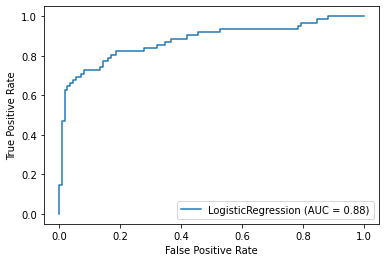

In [174]:
plot_roc_curve(log_reg,X_test_sca,y_test)

In [177]:
# y_score = regr.decision_function(X_test)
fpr,tpr,thresh = roc_curve(y_test,y_score)#[:,1])

print(f"ROC-area-under-the-curve= {round(auc(fpr,tpr),3)}")

ROC-area-under-the-curve= 0.877


[Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 0, 'False Positive Rate'),
 Text(0.5, 1.0, 'Receiver operating characteristic (ROC) Curve')]

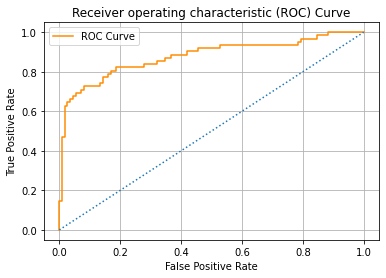

In [178]:
fig,ax=plt.subplots()
ax.plot(fpr,tpr,color='darkorange',label='ROC Curve')
ax.plot([0,1],[0,1],ls=':')
ax.legend()
ax.grid()
ax.set(ylabel='True Positive Rate',xlabel='False Positive Rate',
      title='Receiver operating characteristic (ROC) Curve')


ROC-area-under-the-curve= 0.877


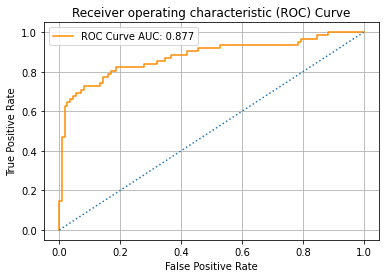

In [183]:
def my_plot_roc_curve(y_test,y_score_prob):
    # y_score = regr.decision_function(X_test)
    fpr,tpr,thresh = roc_curve(y_test,y_score_prob[:,1])
    print(f"ROC-area-under-the-curve= {round(auc(fpr,tpr),3)}")

    fig,ax=plt.subplots()
    ax.plot(fpr,tpr,color='darkorange',label=f'ROC Curve AUC: {round(auc(fpr,tpr),3)}')
    ax.plot([0,1],[0,1],ls=':')
    ax.legend()
    ax.grid()
    ax.set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')

    
my_plot_roc_curve(y_test,y_score_prob)

In [ ]:
my_plot_roc_curve(y_test,y_score_prob)

# Class Imbalance Problems

## The Problem

## When metrics can be misleading...
- i.e. accuracy


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       112
           1       0.74      0.77      0.76        62

    accuracy                           0.82       174
   macro avg       0.81      0.81      0.81       174
weighted avg       0.82      0.82      0.82       174



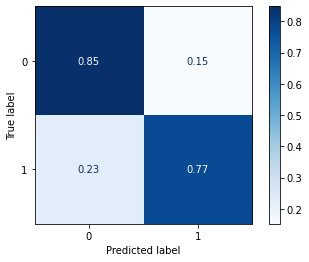

In [185]:
# from sklearn
regr = LogisticRegression()#C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

# cm = confusion_matrix(y_test,y_hat_test)
# cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(metrics.classification_report(y_test,y_hat_test))
# plot_cm(cm_norm.round(3))
metrics.plot_confusion_matrix(regr,X_test_sca,y_test,
                     cmap='Blues',normalize='true')

In [186]:
y_train.value_counts(normalize=True)

0    0.591633
1    0.408367
Name: Survived, dtype: float64

In [187]:
y_test.value_counts(normalize=True)

0    0.643678
1    0.356322
Name: Survived, dtype: float64

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       112
           1       0.00      0.00      0.00        62

    accuracy                           0.64       174
   macro avg       0.32      0.50      0.39       174
weighted avg       0.41      0.64      0.50       174



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



(<Figure size 576x396 with 2 Axes>,
 <AxesSubplot:title={'center':'Normalized Confusion Matrix\n(by true classes)'}, xlabel='Predicted Classes', ylabel='True Classes'>)

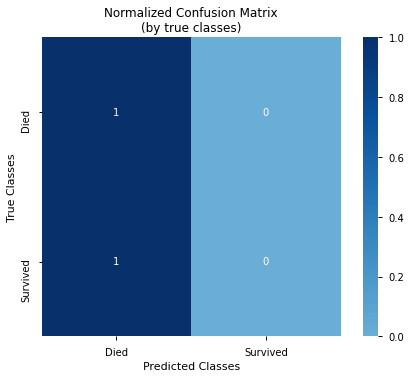

In [190]:
## Let's guess  for every observation
preds = np.zeros_like(y_test)
print(metrics.classification_report(y_test,preds))
plot_confusion_matrix(y_test,preds)

## The Possible Solutions

- Using class_weights 
- Oversampling the minority class
- Undersampling the majority class

In [ ]:
regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Solution 1: `class_weight="balanced"`


In [ ]:
regr = LogisticRegression(class_weight='balanced',C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Solution 2: Oversampling minority class with SMOTE

In [ ]:
y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_sample(X_train_sca,y_train)
pd.Series(y_train_smote).value_counts()

In [ ]:
regr = LogisticRegression(class_weight='balanced',C=1e5, solver='liblinear')
regr.fit(X_train_smote, y_train_smote)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Solution 3: Undersampling majority class

In [ ]:
display(X_train,y_train)
df_balance = pd.concat([X_train, y_train],axis=1)
df_balance

In [ ]:
n_samples = df_balance['Survived'].value_counts().min()
n_samples

In [ ]:
df_balance.groupby('Survived').groups

In [ ]:
df_resample = pd.DataFrame()
for grp,idx in df_balance.groupby('Survived').groups.items():
    
    resample = df_balance.loc[idx].sample(n=n_samples,random_state=123)
    df_resample = pd.concat([df_resample,resample],axis=0)
    
display(df_resample.head(), df_resample["Survived"].value_counts())



In [ ]:
X_train_under = df_resample.drop('Survived',axis=1).copy()
y_train_under = df_resample['Survived'].copy()

regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train_under, y_train_under)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

# Sect 26: Topics to Discuss

- Recommendation: do not get too stressed out about that this module. Its a lot of revisiting concepts that we've discussed before. 
    - Don't stress about the labs, look at the solutions and digest what they are doing.
    
- [Terms to remember](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-26-in-depth-logistic-regression/mle-review)
    - "log-likelihood"
    - "Maximum Likelihood Estimation"

# Activity: Make an `evaluate_classification` function

- Write a function called evaluate_classification
- It should accept: 
    - y_true,
    - y_pred
    - 
- It should produce:
    - Classification metrics printed
    - Confusion Matrix displayed
    - roc_auc curve displayed
    
    
- Then revisit some of the questions we had from last class re: scaling, LogisticRegression parameters

In [ ]:

def evaluate_classification(y_true, y_pred): 
    import sklearn.metrics as metrics
     
    ## Classification Report / Scores 
    
    
    ## Confusion Matrix 
    
    
    ## Roc Curve
    
    
    ## LEVEL UP: Subplots
    
    

    
    